---
# **Projek Pertama - Klasifikasi Penyakit Diabetes**


---
Author : `David Mario Yohanes Samosir`


## Intalasi Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import files

## Data Wrangling
* **Gathering Data** = Melakukan pengumpulan data serta membaca dataset
* **Assessing Data** = Memeriksa dan memahami data
* **Cleaning Data** = Membersihkan data dari kesalahan/error

### Gathering Data
- Dataset diunduh terlebih dahulu dari [Kaggle](https://www.kaggle.com/datasets/sitirahmahbasri/data-penyakit-diabetes/data).
- Upload File Dataset yang sudah di unduh
- Load Dataset

In [2]:
# Mengunggah file dari komputer lokal
uploaded = files.upload()

# Contoh: Menyimpan file yang diunggah ke dalam file lokal di Colab
with open('diabetes.csv', 'wb') as f:
    f.write(uploaded['diabetes.csv'])

Saving diabetes.csv to diabetes.csv


In [3]:
# Load Dataset
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


### Assessing Data

In [4]:
# Menampilkan jumlah nilai yang hilang dan nilai duplikat dalam dataset.
print("Data Kosong:", df.isnull().sum().sum())
print("Data Ganda:", df.duplicated().sum())

Data Kosong: 0
Data Ganda: 1256


Hasil: Tidak ada nilai yang hilang dalam dataset. Namun, terdapat 1256 data duplikat yang perlu dihapus.

In [5]:
df.shape

(2000, 9)

Hasil: Dataset sekarang memiliki 744 baris dan 9 kolom.

In [6]:
# Melihat informasi umum tentang dataset, termasuk jumlah nilai non-null dan tipe data masing-masing kolom.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Hasil: Semua kolom memiliki 744 nilai non-null, menunjukkan tidak ada nilai yang hilang. Tipe data mencakup int64 dan float64.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Hasil: Statistik deskriptif memberikan gambaran umum tentang distribusi data.

Contohnya, kolom 'Glucose' memiliki nilai rata-rata 120.89 dan standar deviasi 31.94.

### Data Wrangling - Cleaning Data

In [8]:
# Menghapus data duplikat dari dataset untuk memastikan data yang digunakan unik.
df.drop_duplicates(inplace=True)
print("Jumlah nilai duplikat:", df.duplicated().sum())

Jumlah nilai duplikat: 0


Hasil: Semua data duplikat berhasil dihapus, sehingga sekarang tidak ada lagi data duplikat dalam dataset.

### Exploratory Data Analysis (EDA)

In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
5            99       54             28             83       34.0  0.499                     30   0          1
             77       82             41             42       35.8  0.156                     35   0          1
             78       48             0              0        33.7  0.654                     25   0          1
             85       74             22             0        29.0  1.224                     32   1          1
                                                                                                            ..
2            82       52             22             115      28.5  1.699                     25   0          1
             83       65             28             66       36.8  0.629                     24   0          1
      

#### Explore Nilai Ssetiap Fitur Dataset

In [10]:
# Jumlah Data Pregnancies
print("Jumlah Data", df.Pregnancies.value_counts())

Jumlah Data Pregnancies
1     130
0     112
2     105
3      72
4      68
5      53
6      49
7      41
8      35
9      27
10     20
11     10
12      9
13      9
14      2
15      1
17      1
Name: count, dtype: int64


Hasil: Distribusi jumlah kehamilan bervariasi, dengan nilai paling umum adalah 1 (130 kali) dan 0 (112 kali).

In [11]:
# Jumlah Data Glucose
print("Jumlah Data", df.Glucose.value_counts())

Jumlah Data Glucose
100    17
99     16
111    14
106    14
129    14
       ..
178     1
182     1
44      1
177     1
190     1
Name: count, Length: 136, dtype: int64


Hasil: Nilai glukosa berkisar dari 0 hingga 199, dengan nilai paling umum adalah 100 (17 kali)

In [12]:
# Jumlah Data BloodPressure
print("Jumlah Data", df.BloodPressure.value_counts())

Jumlah Data BloodPressure
70     54
74     50
68     45
78     45
64     43
72     42
80     38
76     37
62     36
60     36
0      34
82     29
66     28
88     24
84     22
90     21
86     21
58     20
50     12
56     12
54     11
52     11
65      7
75      7
94      6
85      6
48      5
92      5
44      5
96      3
106     3
110     3
98      3
100     3
108     2
55      2
104     2
46      2
114     1
38      1
24      1
95      1
61      1
102     1
30      1
122     1
40      1
Name: count, dtype: int64


Hasil: Tekanan darah berkisar dari 0 hingga 122, dengan nilai paling umum adalah 70 (54 kali).

In [13]:
# Jumlah Data SkinThickness
print("Jumlah Data", df.SkinThickness.value_counts())

Jumlah Data SkinThickness
0      215
32      30
30      27
27      23
23      21
28      20
18      20
31      19
39      19
33      19
37      17
19      16
40      16
25      16
29      16
22      16
17      14
26      14
41      14
35      13
36      13
20      13
15      13
24      12
42      11
13      11
21      10
46       8
34       8
12       7
14       6
43       6
16       6
38       6
45       5
44       5
10       5
11       5
48       4
49       4
50       3
47       3
7        2
52       2
54       2
8        2
63       1
99       1
59       1
60       1
56       1
51       1
110      1
Name: count, dtype: int64


Hasil: Ketebalan kulit berkisar dari 0 hingga 110, dengan nilai paling umum adalah 0 (215 kali), menunjukkan banyak data yang hilang atau tidak terisi di kolom ini.

In [14]:
# Jumlah Data Insulin
print("Jumlah Data", df.Insulin.value_counts())

Jumlah Data Insulin
0      359
105     11
130      9
140      9
120      8
      ... 
108      1
73       1
171      1
255      1
177      1
Name: count, Length: 182, dtype: int64


Hasil: Nilai insulin berkisar dari 0 hingga 744, dengan nilai paling umum adalah 0 (359 kali), menunjukkan banyak data yang hilang atau tidak terisi di kolom ini.

In [15]:
# Jumlah Data BMI
print("Jumlah Data", df.BMI.value_counts())

Jumlah Data BMI
32.0    13
31.2    12
31.6    11
32.4    10
0.0     10
        ..
42.2     1
41.0     1
46.7     1
45.5     1
48.7     1
Name: count, Length: 247, dtype: int64


Hasil: Nilai BMI berkisar dari 0 hingga 80.6, dengan nilai paling umum adalah 32.0 (13 kali).

In [16]:
# Jumlah Data DiabetesPedigreeFunction
print("Jumlah Data", df.DiabetesPedigreeFunction.value_counts())

Jumlah Data DiabetesPedigreeFunction
0.258    6
0.207    5
0.268    5
0.259    5
0.261    5
        ..
0.092    1
0.926    1
0.427    1
1.213    1
0.320    1
Name: count, Length: 505, dtype: int64


Hasil: Fungsi keturunan diabetes bervariasi, dengan nilai paling umum adalah 0.258 (6 kali).

In [17]:
# Jumlah Data Age
print("Jumlah Data", df.Age.value_counts())

Jumlah Data Age
22    70
21    62
25    48
24    47
23    38
28    34
26    32
27    31
29    27
31    21
41    20
30    19
37    19
42    18
36    17
33    16
45    15
38    15
40    14
34    13
32    13
46    13
43    12
39    12
35    10
44     9
52     8
50     8
47     7
58     7
51     6
54     5
63     5
49     5
48     5
53     4
55     4
66     4
60     4
62     4
67     3
57     3
65     3
56     3
69     2
61     2
59     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64


Hasil: Usia berkisar dari 21 hingga 81, dengan usia paling umum adalah 22 (70 kali).

In [18]:
# Jumlah Data Outcome
print("Jumlah Data", df.Outcome.value_counts())

Jumlah Data Outcome
0    491
1    253
Name: count, dtype: int64


Hasil: Sebagian besar data memiliki nilai Outcome 0 (491 kali), menunjukkan ketidakseimbangan kelas yang perlu diperhatikan saat pemodelan.

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


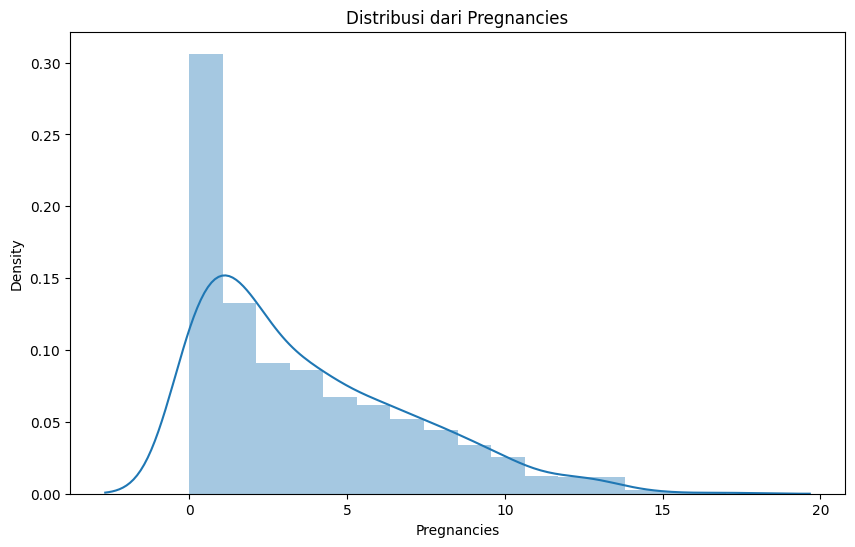

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


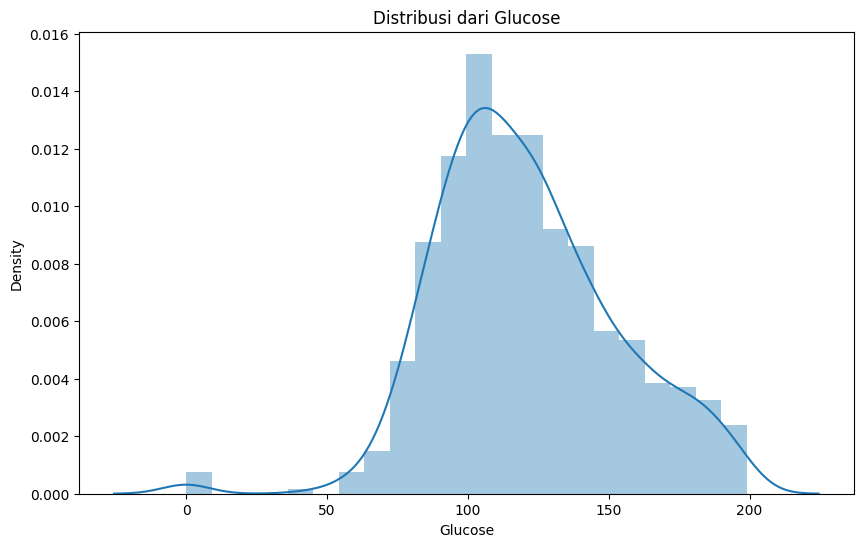

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


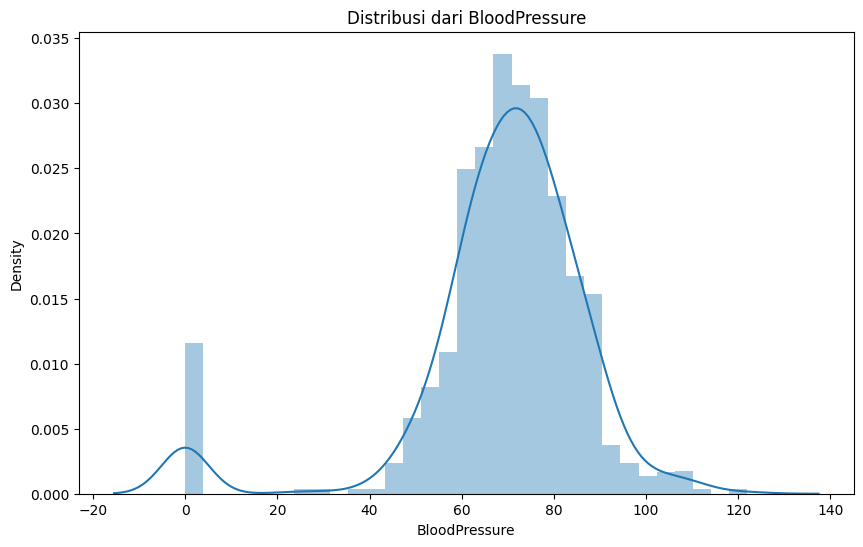

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


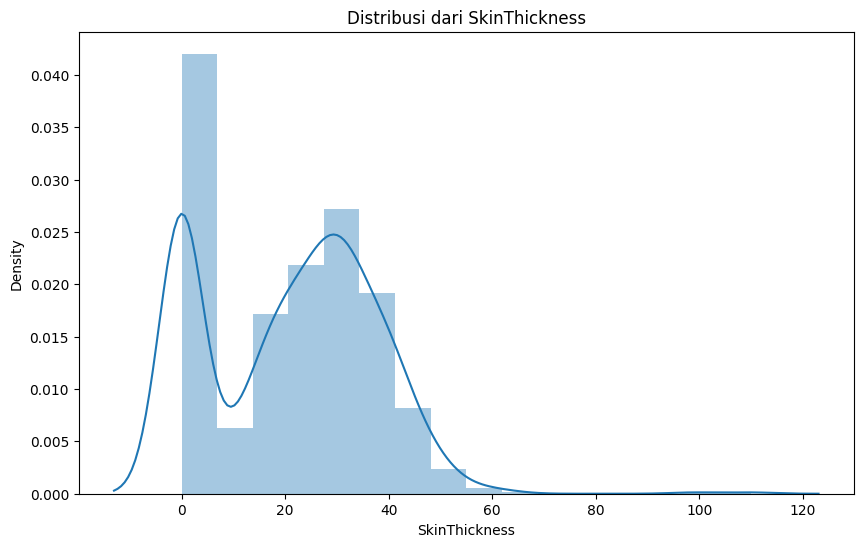

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


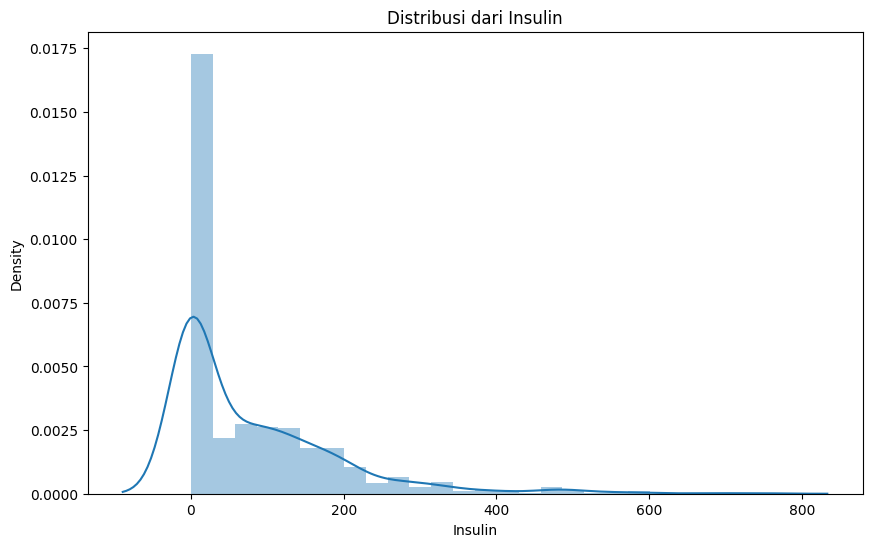

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


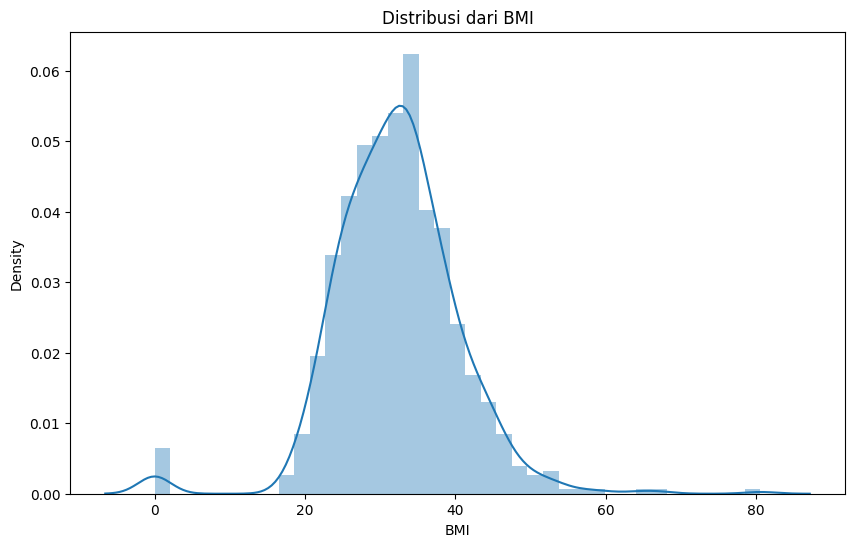

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


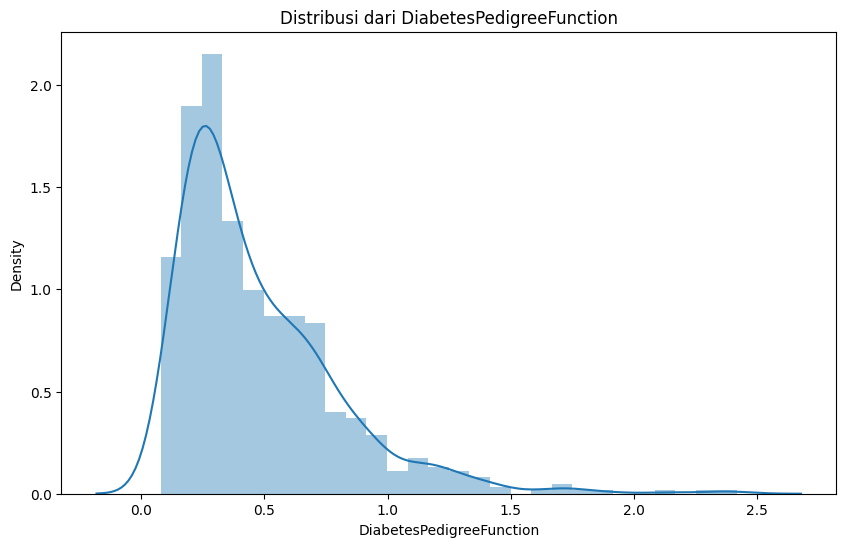

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


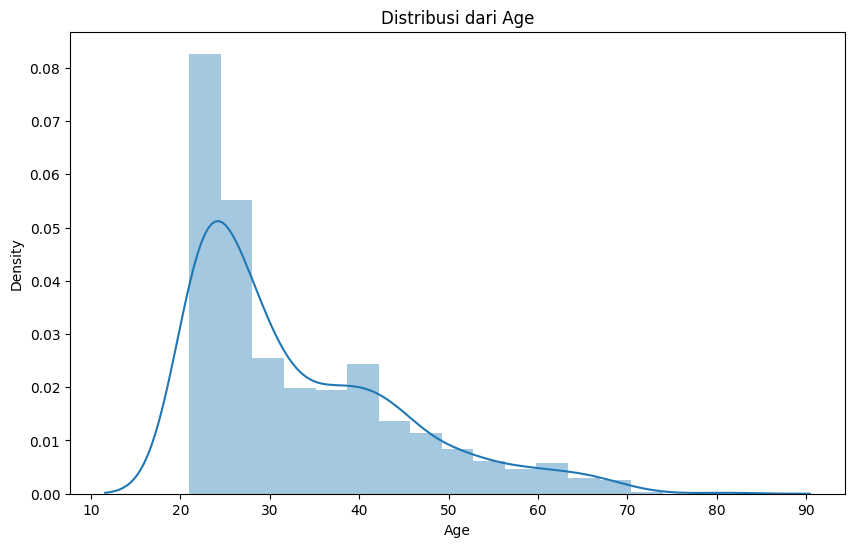

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


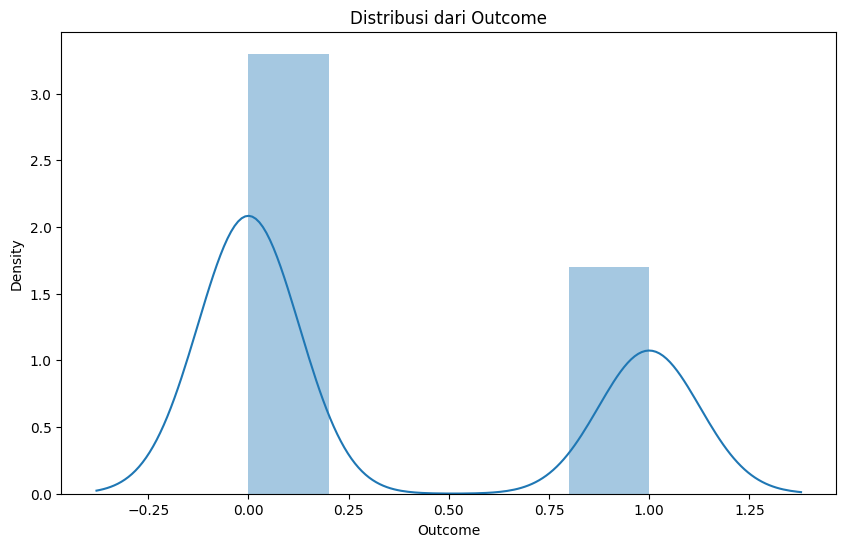

In [19]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[column].dropna(), kde=True)
    plt.title(f'Distribusi dari {column}')
    plt.show()

### Matriks Korelasi

In [20]:
# Melihat correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117050,0.144284,-0.062530,-0.055783,0.025621,-0.024800,0.536657,0.220942
Glucose,0.117050,1.000000,0.137616,0.070855,0.325135,0.239693,0.133669,0.248673,0.453939
BloodPressure,0.144284,0.137616,1.000000,0.189010,0.091822,0.272704,0.051479,0.242559,0.078808
SkinThickness,-0.062530,0.070855,0.189010,1.000000,0.436080,0.367853,0.184098,-0.103400,0.075562
Insulin,-0.055783,0.325135,0.091822,0.436080,1.000000,0.205365,0.202825,-0.063747,0.114655
BMI,0.025621,0.239693,0.272704,0.367853,0.205365,1.000000,0.124132,0.053336,0.278123
DiabetesPedigreeFunction,-0.024800,0.133669,0.051479,0.184098,0.202825,0.124132,1.000000,0.033321,0.174688
Age,0.536657,0.248673,0.242559,-0.103400,-0.063747,0.053336,0.033321,1.000000,0.242077
Outcome,0.220942,0.453939,0.078808,0.075562,0.114655,0.278123,0.174688,0.242077,1.000000


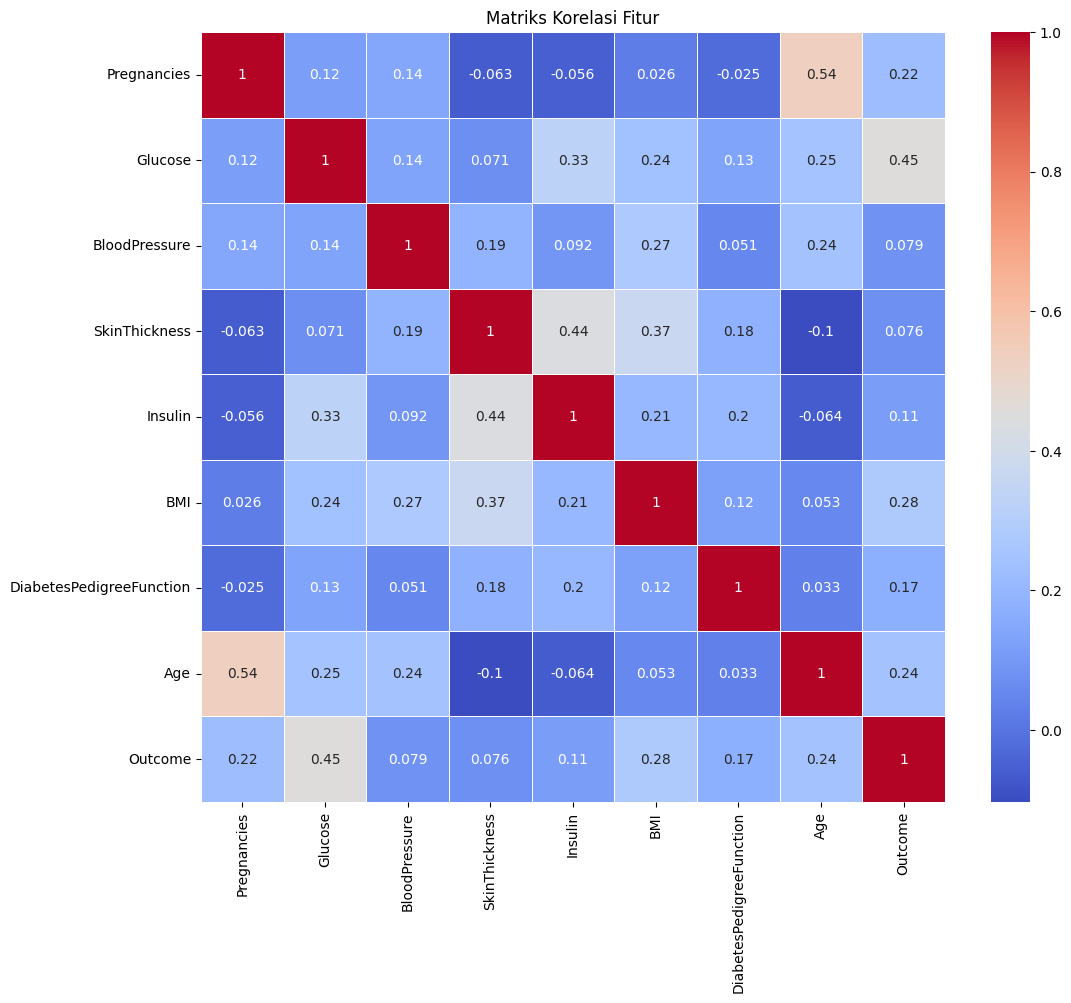

In [21]:
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

In [22]:
# Melihat korelasi dengan variabel target ('Outcome')
target_correlations = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Korelasi fitur dengan variabel target (Outcome):")
print(target_correlations)

Korelasi fitur dengan variabel target (Outcome):
Outcome                     1.000000
Glucose                     0.453939
BMI                         0.278123
Age                         0.242077
Pregnancies                 0.220942
DiabetesPedigreeFunction    0.174688
Insulin                     0.114655
BloodPressure               0.078808
SkinThickness               0.075562
Name: Outcome, dtype: float64


Hasil: Korelasi fitur dengan 'Outcome' membantu dalam menentukan fitur-fitur yang paling berpengaruh. 'Glucose', 'BMI', 'Age', dan 'Pregnancies' adalah beberapa fitur yang memiliki korelasi positif dengan 'Outcome'.

### Pengolahan Dataset (Data Preparation)

In [23]:
# 1. Penanganan nilai yang hilang
df.fillna(df.median(), inplace=True)

In [24]:
# 2. Normalisasi atau standardisasi fitur numerik
numeric_features = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [25]:
# 2. Normalisasi atau standardisasi fitur
scaler = StandardScaler()
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [26]:
# 3. Feature engineering
def create_features(df):
    # Kategorisasi BMI
    df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

    # Fitur interaksi Glucose-Insulin
    df['Glucose_Insulin_Interaction'] = df['Glucose'] * df['Insulin']

    return df

df = create_features(df)

# Pastikan hanya kolom numerik yang digunakan untuk korelasi
numeric_df = df.select_dtypes(include=[np.number])

In [27]:
# 4. Seleksi fitur berdasarkan korelasi dengan variabel target
correlation_threshold = 0.2
corr_with_target = abs(numeric_df.corr()['Outcome'])
selected_features = corr_with_target[corr_with_target > correlation_threshold].index.tolist()
selected_features.remove('Outcome')  # Hapus target dari list fitur

print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: ['Pregnancies', 'Glucose', 'BMI', 'Age']


In [28]:
# 5. Penanganan outlier
# Menggunakan IQR untuk mendeteksi outlier
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'Glucose')
df = remove_outliers(df, 'BMI')
df = remove_outliers(df, 'Insulin')

In [29]:
# 6. Encoding fitur kategorikal
# Menggunakan one-hot encoding untuk BMI_Category
df_encoded = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

In [30]:
# 7. Splitting data
X = df_encoded[selected_features]
y = df_encoded['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (552, 4)
Shape of X_test: (139, 4)
Shape of y_train: (552,)
Shape of y_test: (139,)


In [31]:
# 8. Penanganan ketidakseimbangan kelas
# Menggunakan SMOTE untuk oversampling kelas minoritas
over_sampler = SMOTE(sampling_strategy=0.5, random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
pipeline = imbpipeline(steps=[('over', over_sampler), ('under', under_sampler)])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [32]:
# 9. Skalasi fitur
# Menggunakan Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [33]:
# 10. Validasi integritas data
# Memastikan tidak ada duplikasi data
duplicates = df.duplicated()
print("Jumlah duplikasi data:", duplicates.sum())

# Cek hasil akhir
print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)

Jumlah duplikasi data: 0

Shape of X_train_scaled: (451, 4)
Shape of y_train_resampled: (451,)
Shape of X_test_scaled: (139, 4)
Shape of y_test: (139,)


## Modeling Data
Menggunakan 3 Algoritma:
  1. Logistic Regression
  2. Decision Tree
  3. Random Forest

Logistic Regression:
[[78 11]
 [20 30]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        89
           1       0.73      0.60      0.66        50

    accuracy                           0.78       139
   macro avg       0.76      0.74      0.75       139
weighted avg       0.77      0.78      0.77       139

ROC-AUC Score: 0.7382022471910114


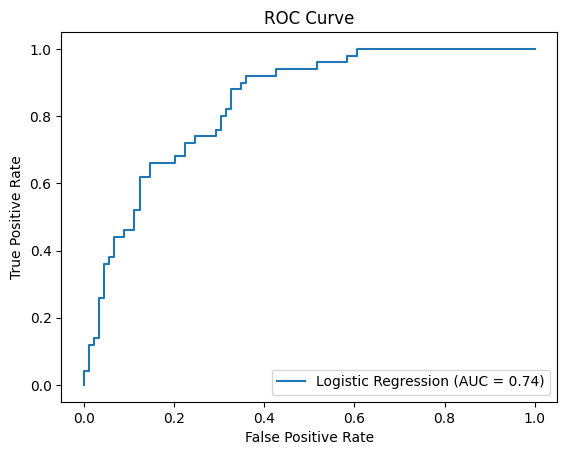

In [34]:
# Inisialisasi model Logistic Regression
lr = LogisticRegression()
# Latih model
lr.fit(X_train_scaled,y_train_resampled)
# Prediksi pada data uji
y_pred_lr = lr.predict(X_test_scaled)

# Evaluating Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Decision Tree:
[[60 29]
 [20 30]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        89
           1       0.51      0.60      0.55        50

    accuracy                           0.65       139
   macro avg       0.63      0.64      0.63       139
weighted avg       0.66      0.65      0.65       139

ROC-AUC Score: 0.6370786516853932


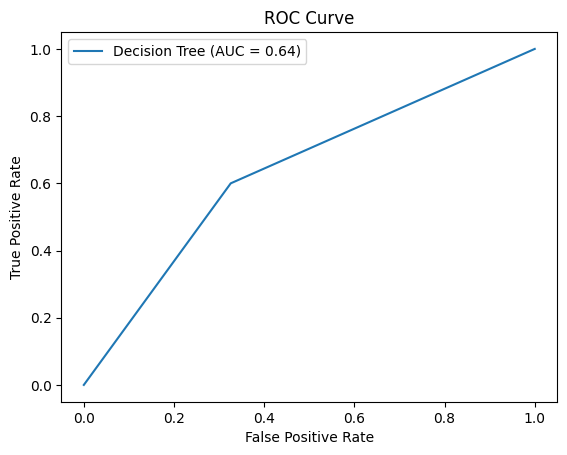

In [35]:
# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()
# Latih model
dt.fit(X_train_scaled,y_train_resampled)
# Prediksi pada data uji
y_pred_dt = dt.predict(X_test_scaled)

# Evaluating Decision Tree
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))

# ROC Curve for Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_dt))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest:
[[70 19]
 [18 32]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        89
           1       0.63      0.64      0.63        50

    accuracy                           0.73       139
   macro avg       0.71      0.71      0.71       139
weighted avg       0.74      0.73      0.73       139

ROC-AUC Score: 0.7132584269662923


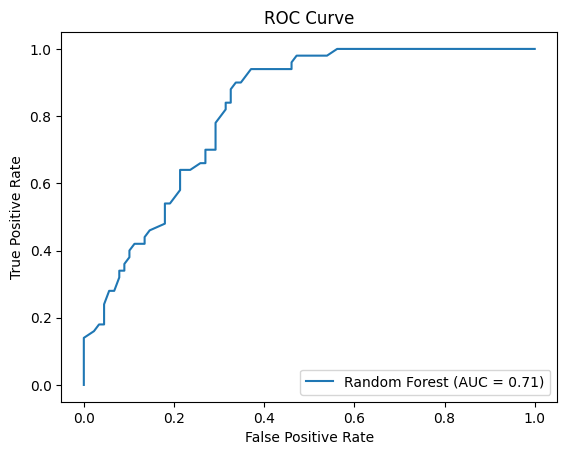

In [36]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier()
# Latih model
rf.fit(X_train_scaled,y_train_resampled)
# Prediksi pada data uji
y_pred_rf = rf.predict(X_test_scaled)

# Evaluating Random Forest
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Evaluasi Model

In [37]:
# Evaluasi Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Evaluasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f"Logistic Regression: \nAccuracy= {accuracy_lr}, \nPrecision= {precision_lr}, \nRecall= {recall_lr}, \nF1-Score= {f1_lr}")
print(f"\n\nDecision Tree: \nAccuracy= {accuracy_dt}, \nPrecision= {precision_dt}, \nRecall= {recall_dt}, \nF1-Score= {f1_dt}")
print(f"\n\nRandom Forest: \nAccuracy= {accuracy_rf}, \nPrecision= {precision_rf}, \nRecall= {recall_rf}, \nF1-Score= {f1_rf}")

Logistic Regression: 
Accuracy= 0.7769784172661871, 
Precision= 0.7317073170731707, 
Recall= 0.6, 
F1-Score= 0.6593406593406594


Decision Tree: 
Accuracy= 0.6474820143884892, 
Precision= 0.5084745762711864, 
Recall= 0.6, 
F1-Score= 0.5504587155963302


Random Forest: 
Accuracy= 0.7338129496402878, 
Precision= 0.6274509803921569, 
Recall= 0.64, 
F1-Score= 0.6336633663366336


In [38]:
# Pilih model terbaik berdasarkan hasil evaluasi
if f1_rf > f1_dt and f1_rf > f1_lr:
    best_model = rf
elif f1_dt > f1_lr:
    best_model = dt
else:
    best_model = lr

print(f"Model terbaik: {best_model}")

Model terbaik: LogisticRegression()


In [39]:
# Compare results
results = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
})

# Display first 10 results for comparison
print(results)

     Actual  Logistic Regression  Decision Tree  Random Forest
412       0                    1              1              1
758       0                    0              0              0
280       1                    1              0              0
366       1                    0              0              0
346       0                    0              0              0
..      ...                  ...            ...            ...
600       0                    0              0              0
27        0                    0              0              0
171       1                    1              0              0
592       1                    0              1              1
725       0                    0              1              1

[139 rows x 4 columns]


In [40]:
# Data sampel untuk prediksi 1
sample_data = np.array([[6, 148, 33.6, 50]])

# Normalisasi data sampel menggunakan StandardScaler yang sudah dilatih
sample_data_scaled = scaler.transform(sample_data)

# Prediksi menggunakan Logistic Regression
pred_lr = lr.predict(sample_data_scaled)
print(f"Logistic Regression prediction: {'Diabetes' if pred_lr[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Decision Tree
pred_dt = dt.predict(sample_data_scaled)
print(f"Decision Tree prediction: {'Diabetes' if pred_dt[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Random Forest
pred_rf = rf.predict(sample_data_scaled)
print(f"Random Forest prediction: {'Diabetes' if pred_rf[0] == 1 else 'No Diabetes'}")


Logistic Regression prediction: Diabetes
Decision Tree prediction: Diabetes
Random Forest prediction: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [41]:
# Data sampel untuk prediksi 2
sample_data = np.array([[3, 210, 12.5, 13]])

# Normalisasi data sampel menggunakan StandardScaler yang sudah dilatih
sample_data_scaled = scaler.transform(sample_data)

# Prediksi menggunakan Logistic Regression
pred_lr = lr.predict(sample_data_scaled)
print(f"Logistic Regression prediction: {'Diabetes' if pred_lr[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Decision Tree
pred_dt = dt.predict(sample_data_scaled)
print(f"Decision Tree prediction: {'Diabetes' if pred_dt[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Random Forest
pred_rf = rf.predict(sample_data_scaled)
print(f"Random Forest prediction: {'Diabetes' if pred_rf[0] == 1 else 'No Diabetes'}")

Logistic Regression prediction: Diabetes
Decision Tree prediction: Diabetes
Random Forest prediction: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:
# Data sampel untuk prediksi 3
sample_data = np.array([[5, 180, 35.5, 45]])

# Normalisasi data sampel menggunakan StandardScaler yang sudah dilatih
sample_data_scaled = scaler.transform(sample_data)

# Prediksi menggunakan Logistic Regression
pred_lr = lr.predict(sample_data_scaled)
print(f"Logistic Regression prediction: {'Diabetes' if pred_lr[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Decision Tree
pred_dt = dt.predict(sample_data_scaled)
print(f"Decision Tree prediction: {'Diabetes' if pred_dt[0] == 1 else 'No Diabetes'}")

# Prediksi menggunakan Random Forest
pred_rf = rf.predict(sample_data_scaled)
print(f"Random Forest prediction: {'Diabetes' if pred_rf[0] == 1 else 'No Diabetes'}")

Logistic Regression prediction: Diabetes
Decision Tree prediction: Diabetes
Random Forest prediction: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
